<a href="https://colab.research.google.com/github/Jasmine-kaur8/Adalone_project/blob/main/Adalone_(project_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving abalone(project 4).csv to abalone(project 4) (1).csv


Uploading the data

In [6]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge

import warnings
warnings.filterwarnings('ignore')


Importing required libraries

In [7]:
#reading the data

data = pd.read_csv('abalone(project 4).csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Reading the top 5 rows of the data.

In [8]:
data.shape

(4177, 9)

This data has 4177 rows and 9 columns.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


All variables are numerical except Sex.

In [10]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Shucked weight has high standard deviation. 
Height has minimum value zero which is not possible.

In [11]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There is no null value.

In [12]:
data['Age'] = data['Rings'] + 1.5
data.drop('Rings' , axis = 1, inplace = True)

We substituted the Rings column with the age column using its defination.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7b2c8a210>,
      dtype=object)

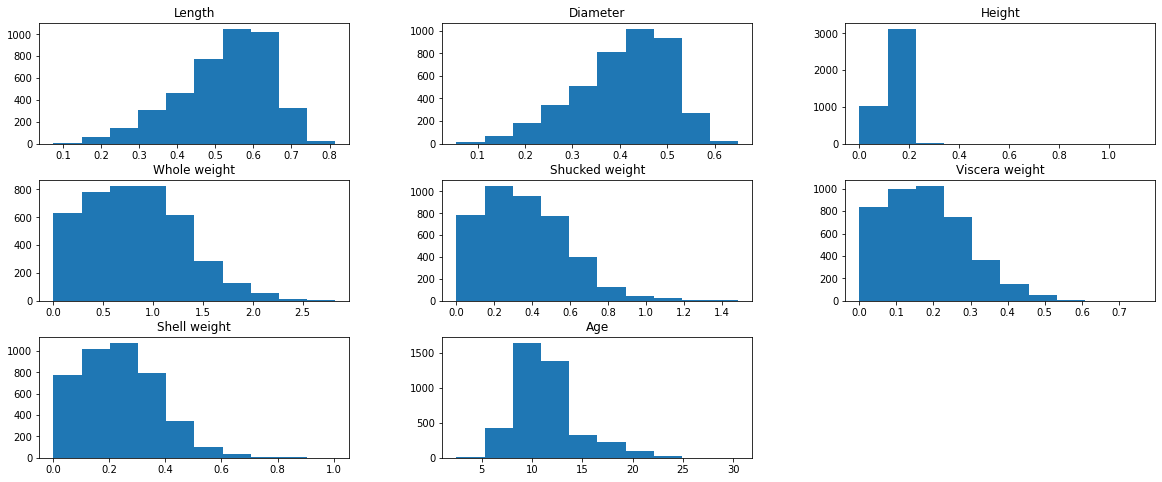

In [13]:
data.hist(figsize = (20,8), grid = False)

The histogram shows that there exists skewness in the features.

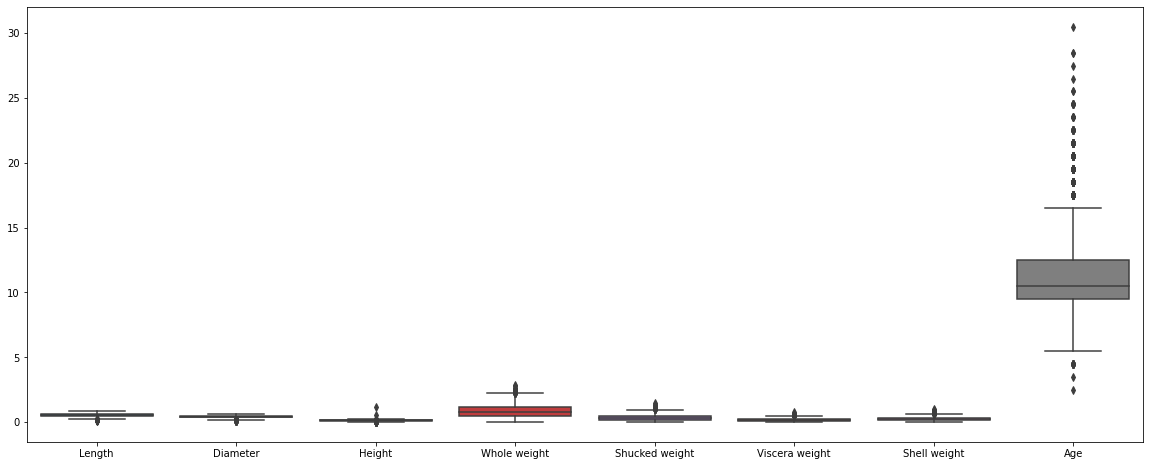

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.boxplot(data = data, ax=ax)
plt.show()

There are outliers in all the columns.

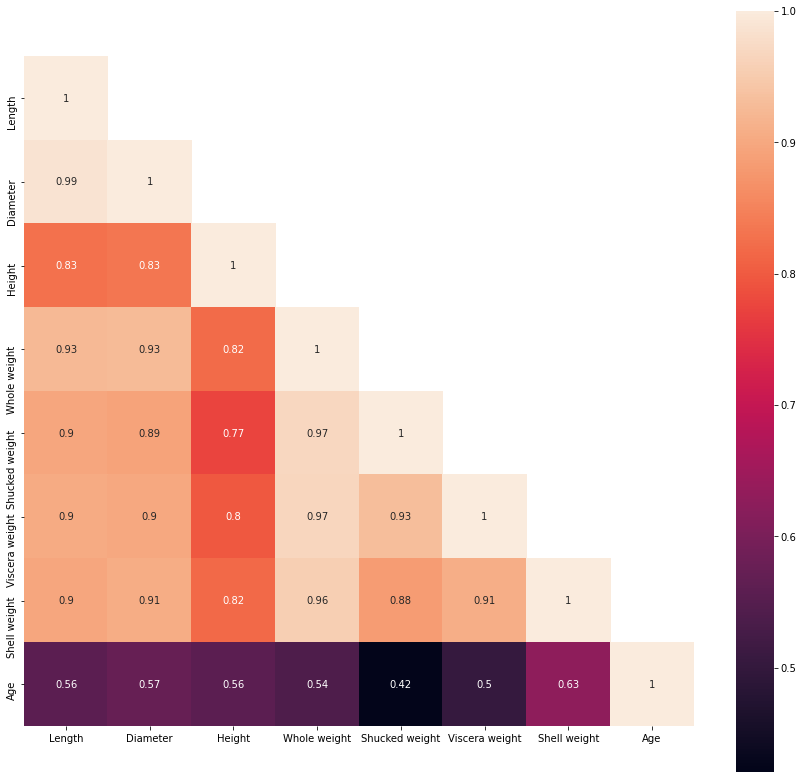

In [15]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(15,14)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)


Heatmap shows that age is related to all the variables. Also, height is highly correlated with all the features.

In [16]:
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

Skewness lies outside the range (-0.5, 0.5). Thus, there is a need to treat outliers.

In [17]:
le = LabelEncoder()

data2 = le.fit_transform(data['Sex'])
data2

array([2, 2, 0, ..., 2, 0, 2])

Converted the coloumn 'Sex' into numeric values using label encoder. 'F' is encoded as 0. 'I' is encoded as 1. 'M' is encoded as 2.

In [18]:
data['Sex'] = data2
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


Substituted the encoded column into the dataset.

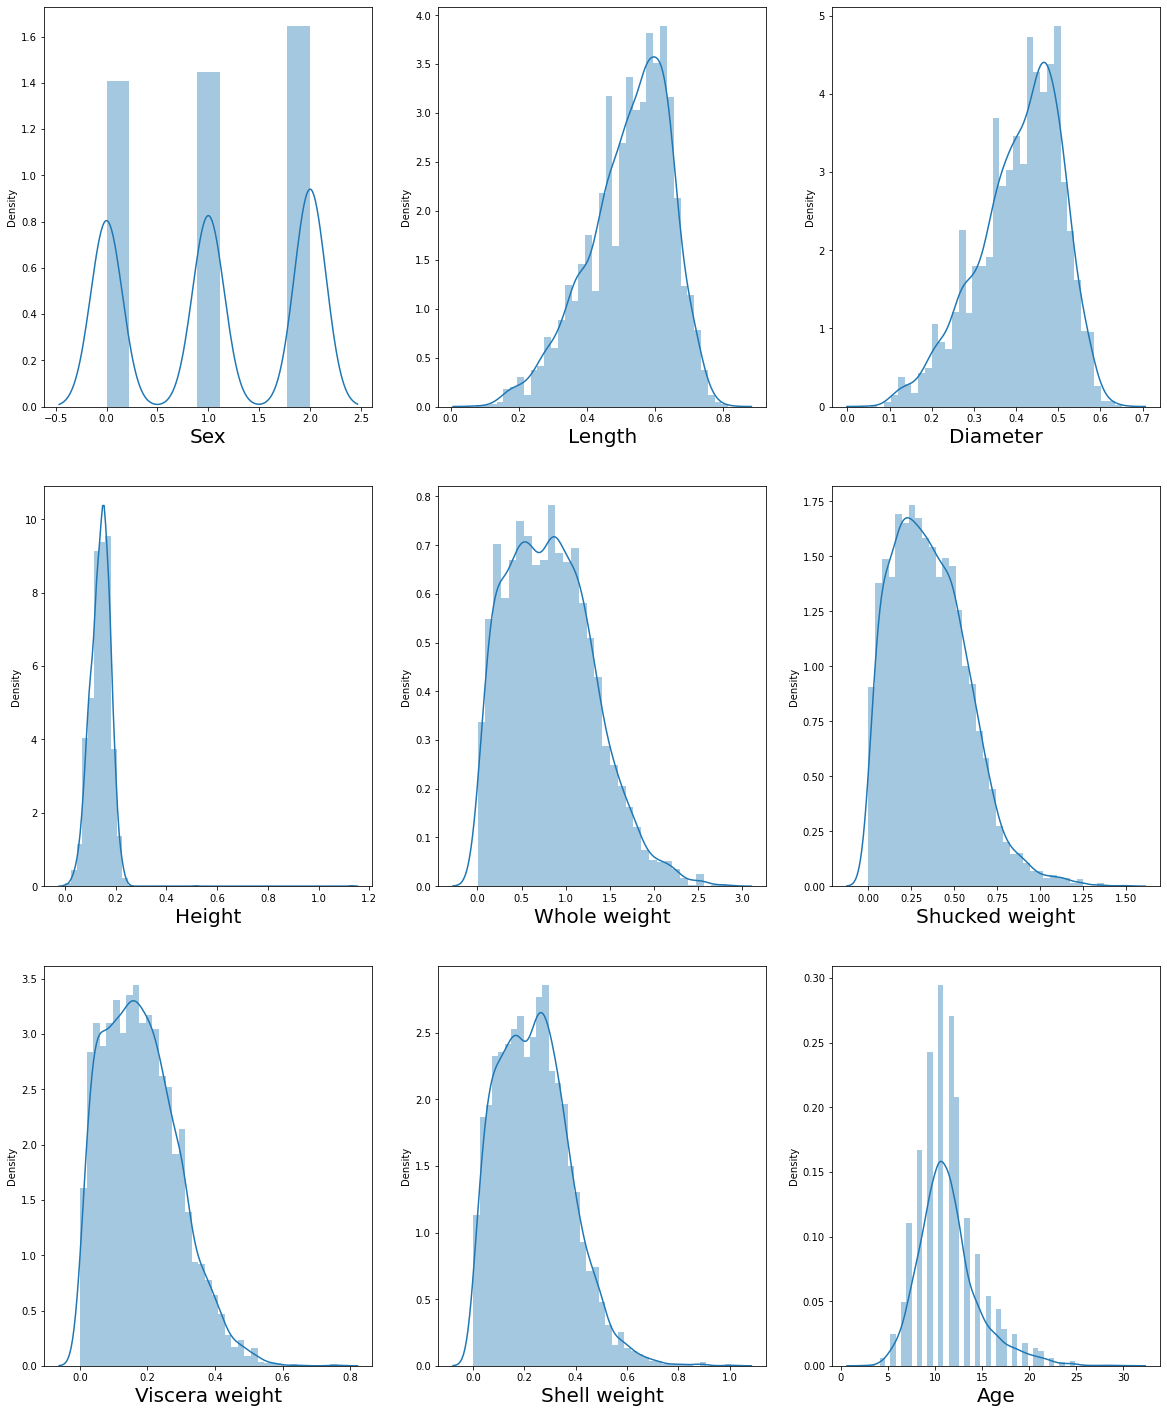

In [19]:
plt.figure(figsize = (20,25))
graph = 1

for column in data:
  if graph<=15:
    ax = plt.subplot(3,3,graph)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

Distribution plot shows that there exists skewness in all the features.

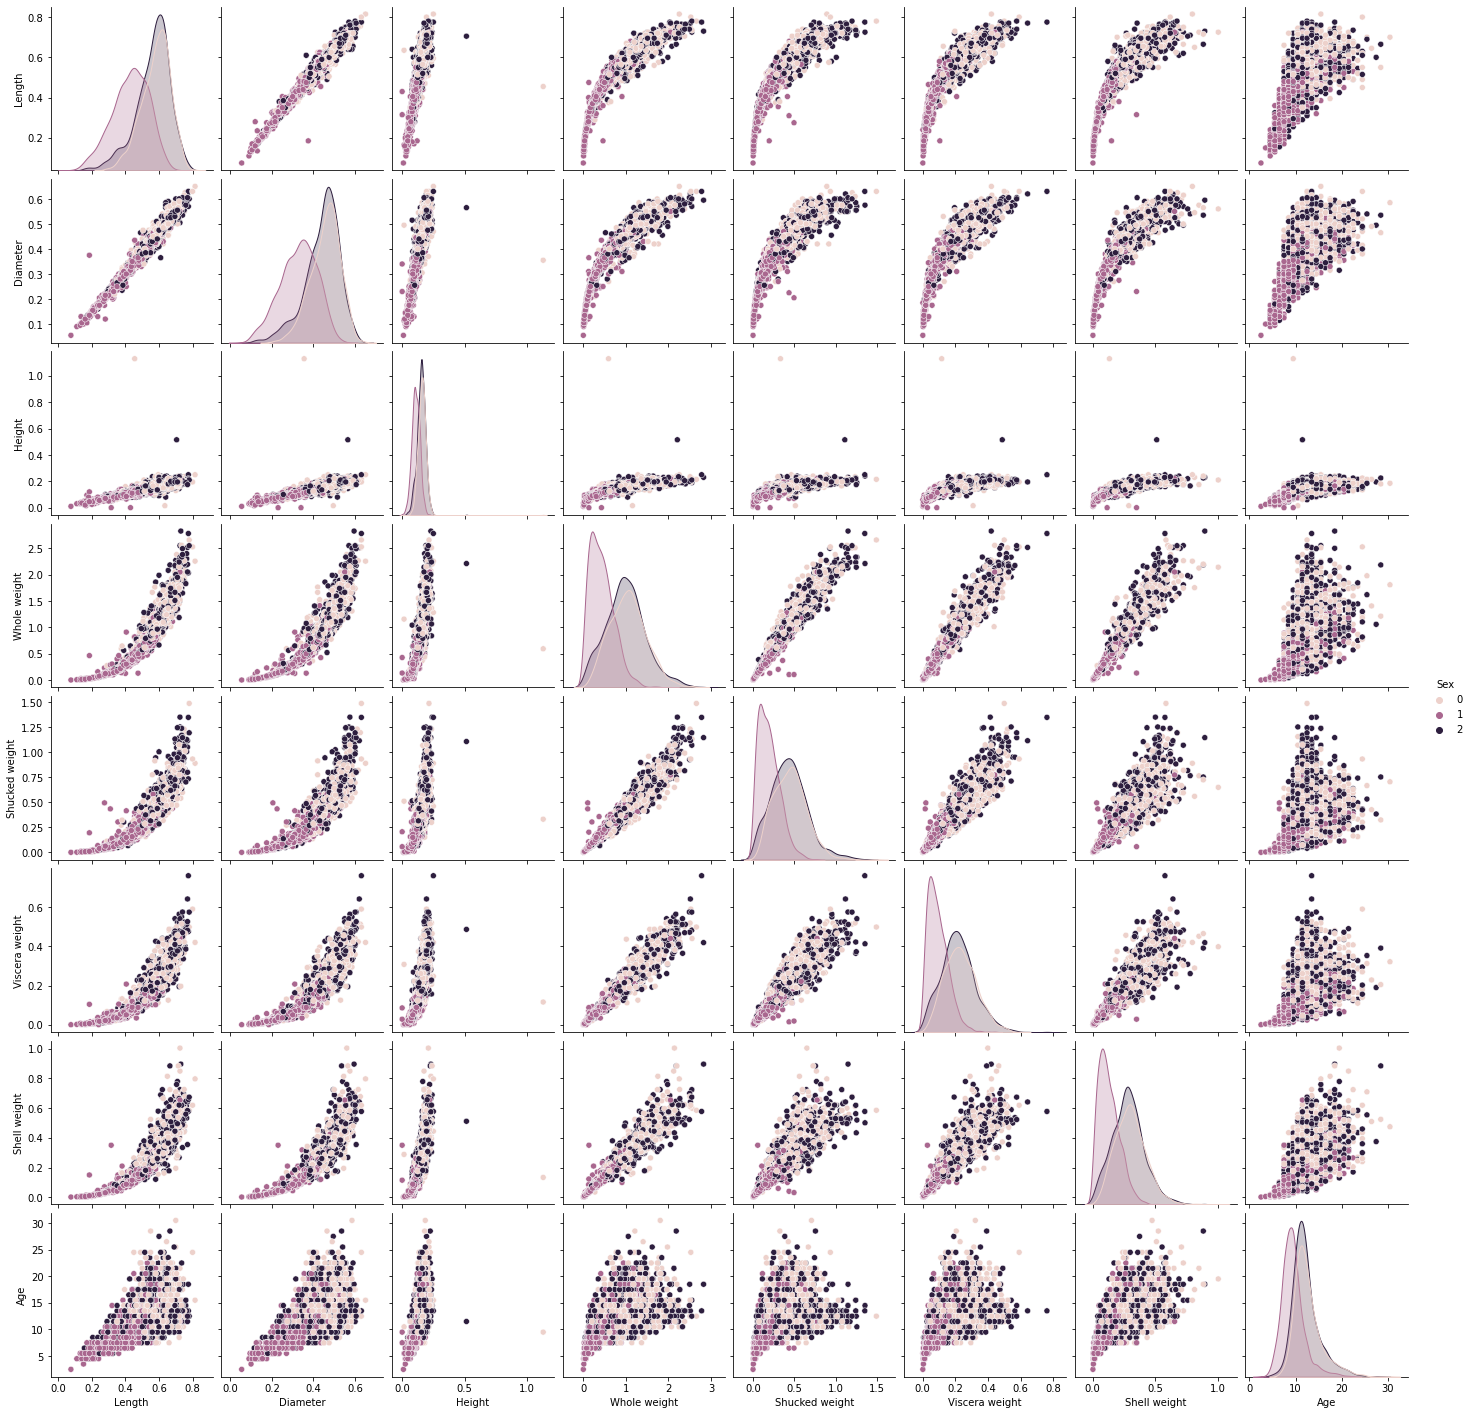

In [20]:
sns.pairplot(data, hue = 'Sex')

The pairplot shows that there exists high correlation between various features.

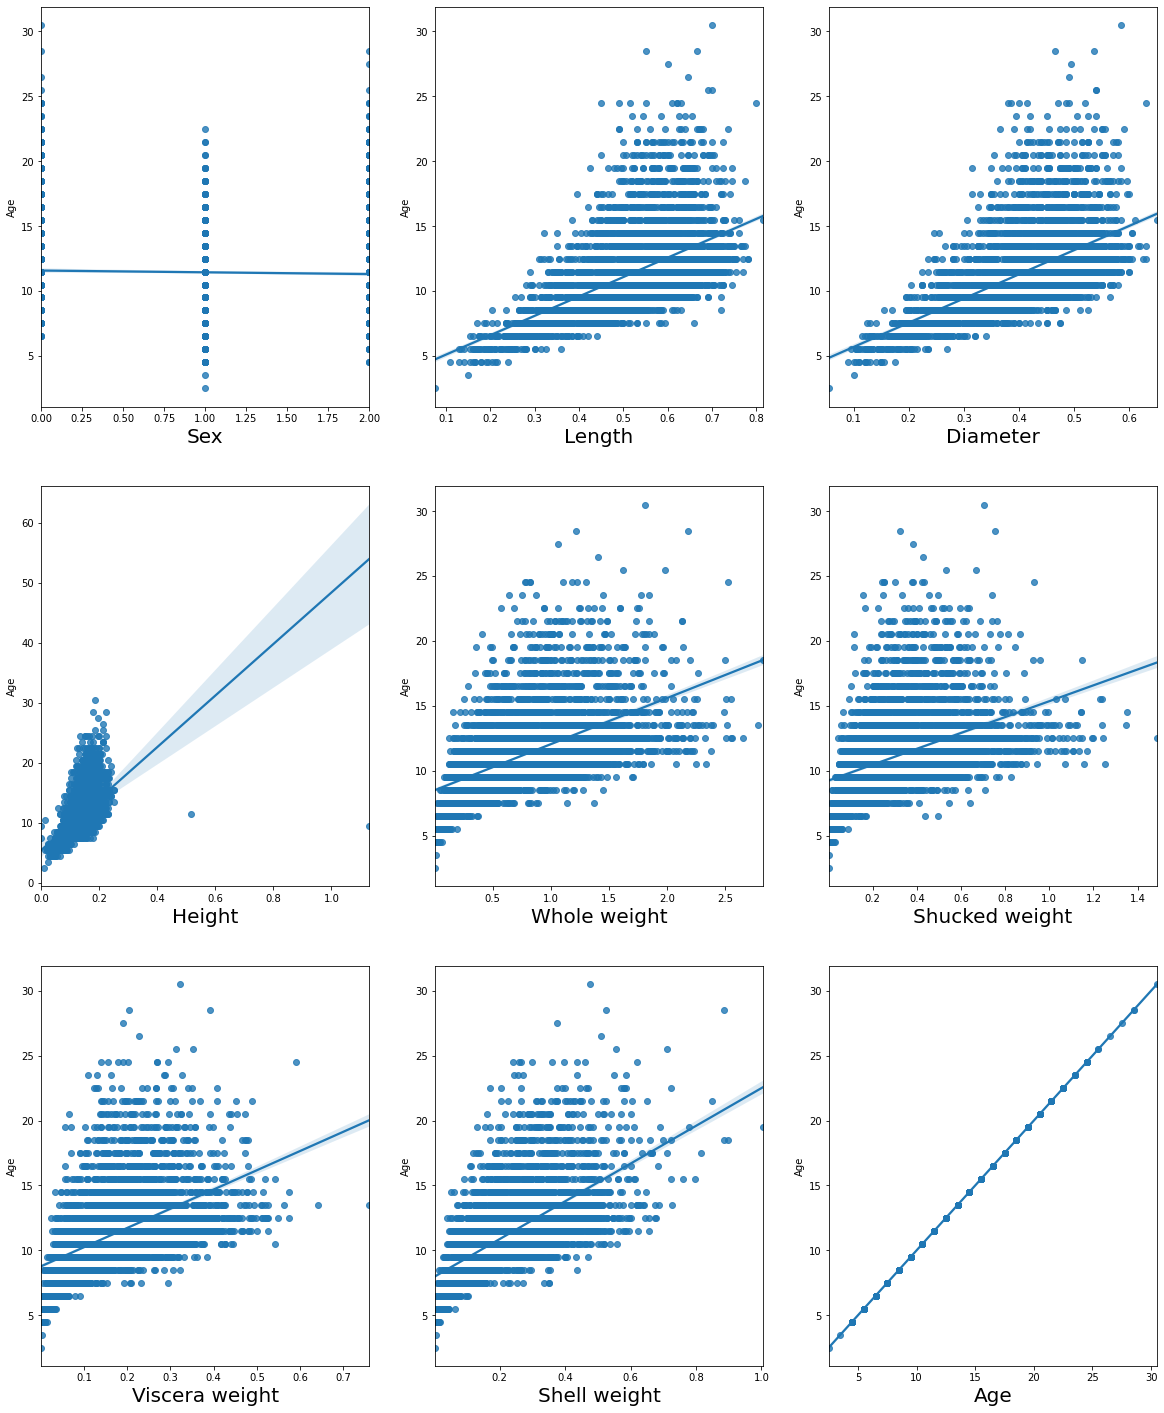

In [21]:
plt.figure(figsize = (20,25))
graph = 1

for column in data:
  if graph<=15:
    ax = plt.subplot(3,3,graph)
    sns.regplot(x = data[column], y = 'Age', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

Regression plot shows how each feature is related to the column age.

In [22]:
#Treating the outliers

# findingout the quantile of data with continuous columns
col = data.drop(columns = ['Sex'])
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
data_new = col[~((col < (Q1 - 1.5 * IQR)) |(col > (Q3 + 1.5 * IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", col.shape)
print("shape after".ljust(20),":", data_new.shape)
print("Percentage Loss".ljust(20),":", (col.shape[0]-data_new.shape[0])/col.shape[0])

shape before and after
shape before         : (4177, 8)
shape after          : (3781, 8)
Percentage Loss      : 0.09480488388795787


Applied IQR to treat outliers.

In [23]:
d = []
del_data = col[((col < (Q1 - 1.5 * IQR)) |(col > (Q3 + 1.5 * IQR))).any(axis=1)]
index = del_data.index

for i in index:
  d.append(i)

Making a list of index of deleted rows.

In [24]:
data3 = data.drop(index = d)
data3.dropna
data4 = data3.reset_index()
data5 = data4.drop(columns = 'index')
data5


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
3776,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
3777,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
3778,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
3779,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


Dropped the rows that has null values. reset the index of remaining rows.

In [25]:
data5.skew()

Sex              -0.097270
Length           -0.495017
Diameter         -0.481941
Height           -0.152640
Whole weight      0.345472
Shucked weight    0.455297
Viscera weight    0.454848
Shell weight      0.342490
Age               0.269205
dtype: float64

Now, the skewness lies between the range (-0.5,0.5). This means we have treated the skewness of the data.

In [26]:
data5.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,3781.000000,3781.000000,3781.000000,3781.000000,3781.000000,3781.000000,3781.000000,3781.000000,3781.000000
mean,1.052896,0.521041,0.404985,0.137325,0.792124,0.347486,0.173871,0.226079,10.930574
std,0.814781,0.111517,0.092269,0.035305,0.444701,0.203506,0.101324,0.122824,2.330442
min,0.000000,0.205000,0.155000,0.040000,0.042500,0.017000,0.000500,0.013000,5.500000
25%,0.000000,0.450000,0.345000,0.110000,0.433000,0.181000,0.090500,0.125000,9.500000
50%,1.000000,0.535000,0.420000,0.140000,0.766500,0.327000,0.164000,0.220000,10.500000
75%,2.000000,0.610000,0.475000,0.165000,1.117500,0.492000,0.244000,0.314500,12.500000
max,2.000000,0.760000,0.600000,0.240000,2.127500,0.960000,0.492000,0.625000,16.500000


Now, no feature has zero minimum value. 

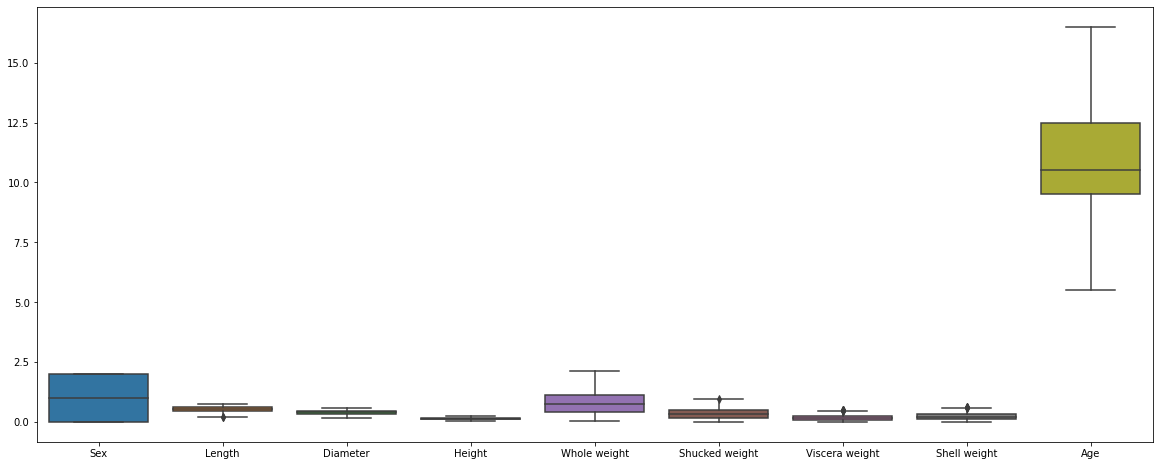

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.boxplot(data = data5, ax=ax)
plt.show()

The outlier problem has been solved.

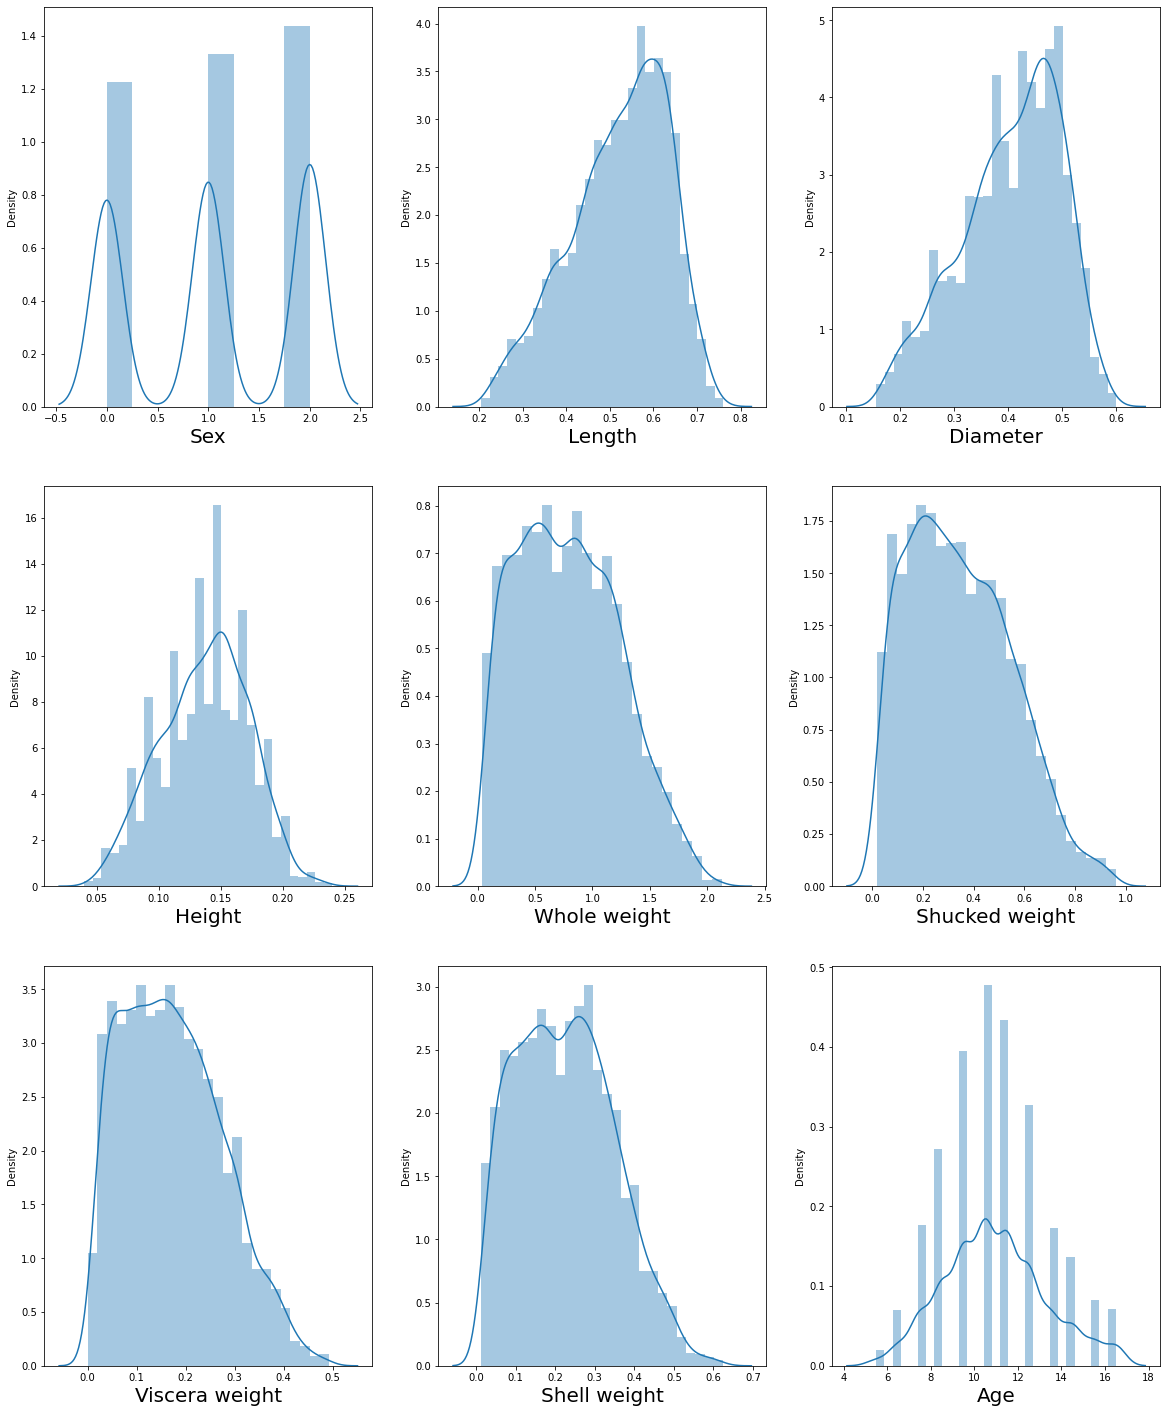

In [28]:
plt.figure(figsize = (20,25))
graph = 1

for column in data5:
  if graph<=15:
    ax = plt.subplot(3,3,graph)
    sns.distplot(data5[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

The skewness has been removed.

In [29]:
#applying standard scaler:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(data5)


Applied standard scaler.

In [30]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = data5.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,Sex,1.010238
1,Length,39.620579
2,Diameter,40.665790
3,Height,6.591350
4,Whole weight,109.333938
5,Shucked weight,31.957742
6,Viscera weight,17.231889
7,Shell weight,23.132759
8,Age,1.964350


Various features have very high vif. Whole weight has the highest vif. We would remove it to deal with the problem of multicollinearity.

In [31]:
data6 = data5.drop(columns = 'Whole weight')
data6

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...
3776,0,0.565,0.450,0.165,0.3700,0.2390,0.2490,12.5
3777,2,0.590,0.440,0.135,0.4390,0.2145,0.2605,11.5
3778,2,0.600,0.475,0.205,0.5255,0.2875,0.3080,10.5
3779,0,0.625,0.485,0.150,0.5310,0.2610,0.2960,11.5


The data after removing Whole weight column.

In [32]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data6)


Applying standard scaler to the data after dropping whole weight column.

In [33]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = data6.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,Sex,1.010036
1,Length,39.618568
2,Diameter,40.665158
3,Height,6.591334
4,Shucked weight,10.489808
5,Viscera weight,10.779652
6,Shell weight,11.829062
7,Age,1.937931


The vif has been reduced significantly for most of the columns. Just Length and Diameter has high vif. We will drop Diameter to deal with the problem of multicollinearity.

In [34]:
data7 = data6.drop(columns = ['Diameter'])
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data7)

Applied standard scaler to the data after removing whole weight and diameter.

In [35]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = data7.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,Sex,1.009741
1,Length,10.535342
2,Height,6.493158
3,Shucked weight,10.463758
4,Viscera weight,10.725569
5,Shell weight,11.416370
6,Age,1.917045


Now, the vif is below 11 for all the features. This is in the acceptable range. 

In [36]:
#Model Building

X = data7.drop('Age', axis = 1)
Y = data7['Age']

Spliting the data into independent variables(X) and dependent variable(Y).

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=30)


models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']

r2 = []
mse = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    

models = {'Modelling Algorithm': model_names, 'r2 score': r2, 'MSE' : mse}
models_df = pd.DataFrame(models)
models_df



,Modelling Algorithm,r2 score,MSE
0,LR,0.487670,2.717383
1,RF,0.529641,2.494768
2,KNN,0.462950,2.848497
3,GB,0.543397,2.421807


We trained the model and calculated r2 score and mse for all the models. The gradient boosting regressor has the highest r2 score.

In [38]:
#cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=30)

models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, X, Y, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,LR,0.399465
1,RF,0.441590
2,KNN,0.382855
3,GB,0.478864


The cross validation score is calculated for all the models.

In [39]:
#Comparing CV Score and the r2 score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['r2 score'] = r2
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [r2[0] - CV_S[0], r2[1] - CV_S[1], r2[2] - CV_S[2], r2[3] - CV_S[3]]
Comparison

,Modelling Algorithm,r2 score,CV SCORE,Difference
0,LR,0.487670,0.399465,0.088205
1,RF,0.529641,0.441590,0.088051
2,KNN,0.462950,0.382855,0.080095
3,GB,0.543397,0.478864,0.064533


The least difference between the r2 score and the cross validation score is of the model gradient boosting regressor. Thus, we will apply hyperparameter tuning on gradient boosting regressor.

In [40]:
#HYPERPARAMETER TUNING:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'criterion' : ('friedman_mse', 'mse', 'mae'),
    'min_samples_split' : range(2,10,2),
    'max_features' : ('auto', 'sqrt', 'log2'),
    'max_depth' : range(1,5)
}


Running the parameters.

In [41]:
grid = GridSearchCV(GradientBoostingRegressor(), param_grid = grid_param)

Applied GridSearchCV.

In [42]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                            

Trained the model.

In [43]:
best_parameters = grid.best_params_
print(best_parameters)

{'criterion': 'mse', 'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 4}


Got the best parameters.

In [44]:
#FINAL MODEL
#Substituting the best parameters in the  GradientBoostingRegressor:

gbr =  GradientBoostingRegressor(criterion = 'mse', max_depth = 4, max_features = 'log2', min_samples_split = 4)

gbr.fit(X_train, y_train)
pred = gbr.predict(X_test)
rscore = r2_score(y_test, pred)
rscore

0.5374164400284442

r2 score after hyperparameter tuning.

In [45]:
#SAVING THE MODEL:

import joblib
joblib.dump(gbr, 'ADALONE_final_model.pkl')

['ADALONE_final_model.pkl']

Saved the model.